In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu02 = pd.read_csv('AHU_02.csv')
ahu02 = ahu02.ffill()

In [3]:
ahu02.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14
0,31-12-2015,00:00:00,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6
1,31-12-2015,00:09:49,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6
2,31-12-2015,00:10:03,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6
3,31-12-2015,00:10:28,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6
4,31-12-2015,00:10:52,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6


In [4]:
ahu02.rename(columns={'Column1':'Date', 'Column2':'Time','Column3':'supply fan status','Column4':'Cooling coil valve %'},inplace = 1)
ahu02.rename(columns={'Column5':'Discharger temp','Column6':'exhaust fan status','Column7':'Mixed air damper %'},inplace=1)
ahu02.rename(columns={'Column8':'Mixed air temp','Column9':'heating coil discharger temp','Column10':'Pre-heat valve %'},inplace=1)
ahu02.rename(columns={'Column11':'re-heat coil valve 1 %','Column12':'re-heat coil valve 2 %','Column13':'re-heat coil 1 Discharger temp'},inplace=1)
ahu02.rename(columns={'Column14':'re-heat coil 2 Discharger temp'},inplace=1)

In [5]:
ahu02.head()

,Date,Time,supply fan status,Cooling coil valve %,Discharger temp,exhaust fan status,Mixed air damper %,Mixed air temp,heating coil discharger temp,Pre-heat valve %,re-heat coil valve 1 %,re-heat coil valve 2 %,re-heat coil 1 Discharger temp,re-heat coil 2 Discharger temp
0,31-12-2015,00:00:00,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6
1,31-12-2015,00:09:49,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6
2,31-12-2015,00:10:03,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6
3,31-12-2015,00:10:28,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6
4,31-12-2015,00:10:52,OFF,1.9,74.5,ON,2.0,75.3,75.2,15.0,16.0,20.0,74.3,74.6


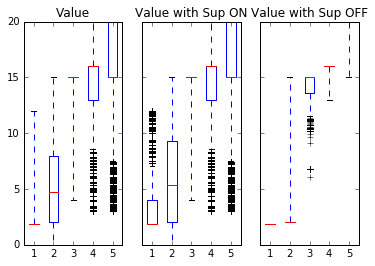

In [8]:
data = [ahu02['Cooling coil valve %'],ahu02['Mixed air damper %'],ahu02['Pre-heat valve %'],
        ahu02['re-heat coil valve 1 %'],ahu02['re-heat coil valve 2 %']]
sup_on = ahu02[ahu02['supply fan status'].str.contains('ON')]
sup_off = ahu02[ahu02['supply fan status'].str.contains('OFF')]
data_percent_1 = [sup_on['Cooling coil valve %'],sup_on['Mixed air damper %'],sup_on['Pre-heat valve %'],
                  sup_on['re-heat coil valve 1 %'], sup_on['re-heat coil valve 2 %']]
data_percent_2 = [sup_off['Cooling coil valve %'],sup_off['Mixed air damper %'],sup_off['Pre-heat valve %'],
                  sup_off['re-heat coil valve 1 %'], sup_off['re-heat coil valve 2 %']]
f , (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True)
ax2.boxplot(data_percent_1)
ax1.boxplot(data)
ax3.boxplot(data_percent_2)
ax1.set_title('Value')
ax2.set_title('Value with Sup ON')
ax3.set_title('Value with Sup OFF')
#plt.show()
plt.savefig(''.join(['values%','_ahu_02']))

In [18]:

#plt.show()


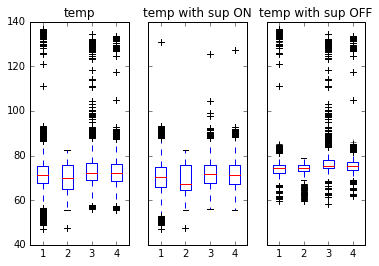

In [9]:
data1 =[ahu02['Discharger temp'],ahu02['Mixed air temp'],ahu02['re-heat coil 1 Discharger temp'],
        ahu02['re-heat coil 2 Discharger temp']]
data_1 = [sup_on['Discharger temp'],sup_on['Mixed air temp'],sup_on['re-heat coil 1 Discharger temp'],
        sup_on['re-heat coil 2 Discharger temp']]
data_2 = [sup_off['Discharger temp'],sup_off['Mixed air temp'],sup_off['re-heat coil 1 Discharger temp'],
        sup_off['re-heat coil 2 Discharger temp']]
f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax2.boxplot(data_1)
ax3.boxplot(data_2)
ax1.boxplot(data1)
ax1.set_title('temp')
ax2.set_title('temp with sup ON')
ax3.set_title('temp with sup OFF')
#plt.show()
plt.savefig(''.join(['temperature','_ahu_02']))

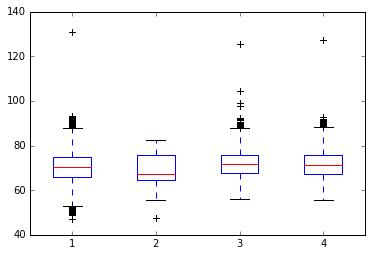

In [13]:
data_temp_sup = [sup_on['Discharger temp'],sup_on['Mixed air temp'],sup_on['re-heat coil 1 Discharger temp'],sup_on['re-heat coil 2 Discharger temp']]
plt.boxplot(data_temp_sup)
#plt.show()
plt.savefig(''.join(['temp_sup_on','_ahu02']))

In [8]:
df1 = ahu02.copy()
df1 = df1.drop(['Date','Time','supply fan status','exhaust fan status'],1)
print df1.columns.values

['Cooling coil valve %' 'Discharger temp' 'Mixed air damper %'
 'Mixed air temp' 'heating coil discharger temp' 'Pre-heat valve %'
 're-heat coil valve 1 %' 're-heat coil valve 2 %'
 're-heat coil 1 Discharger temp' 're-heat coil 2 Discharger temp']


In [ ]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize=(25,25),diagonal = 'kde')
plt.savefig(''.join(['bivariate','ahu_10']))